In [17]:
!pip install lsst

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement lsst (from versions: none)
ERROR: No matching distribution found for lsst

[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [16]:
import pyvo
import os
import lsst

ModuleNotFoundError: No module named 'lsst'

In [2]:
# AUTHENTICATION FOR TAP SERVICE ----------------#
RSP_TAP_SERVICE = 'https://data.lsst.cloud/api/tap'
homedir = os.path.expanduser('~')
token_file = os.path.join(homedir,'.rsp-tap.token')
with open(token_file, 'r') as f:
    token_str = f.readline()
cred = pyvo.auth.CredentialStore()
cred.set_password("x-oauth-basic", token_str)
credential = cred.get("ivo://ivoa.net/sso#BasicAA")
service = pyvo.dal.TAPService(RSP_TAP_SERVICE, credential)

In [3]:
from pyvo.dal.adhoc import DatalinkResults, SodaQuery
query = """SELECT TOP 10 dataproduct_type,dataproduct_subtype,calib_level,lsst_band,em_min,em_max,lsst_tract,lsst_patch,
       lsst_filter,lsst_visit,lsst_detector,lsst_ccdvisitid,t_exptime,t_min,t_max,s_ra,s_dec,s_fov,
       obs_id,obs_collection,o_ucd,facility_name,instrument_name,obs_title,s_region,access_url,
       access_format FROM ivoa.ObsCore WHERE dataproduct_type = 'image' AND dataproduct_subtype = 'lsst.deepCoadd_calexp' AND CONTAINS(POINT('ICRS', 62, -37), s_region)=1"""
results = service.search(query)

dataLinkUrl = results[0].getdataurl()
auth_session = service._session
dl = DatalinkResults.from_result_url(dataLinkUrl, session=auth_session)


In [4]:
fits_images = []

for i in range(len(results)):
    dataLinkUrl = results[i].getdataurl()
    auth_session = service._session
    dl = DatalinkResults.from_result_url(dataLinkUrl, session=auth_session)
    fits_image_url = dl.__getitem__("access_url")[0]
    fits_images.append(fits_image_url)


In [12]:
# downloading to folder
import requests
for i in range(1):#len(fits_images)):
    response = requests.get(fits_images[i])
    help(response.content)
    if response.status_code == 200:
         with open(f"rsb_fits_images/test{i}.fits", 'wb') as file:
             file.write(response.content)
         print("file downloaded successfully")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")

Help on bytes object:

class bytes(object)
 |  bytes(iterable_of_ints) -> bytes
 |  bytes(string, encoding[, errors]) -> bytes
 |  bytes(bytes_or_buffer) -> immutable copy of bytes_or_buffer
 |  bytes(int) -> bytes object of size given by the parameter initialized with null bytes
 |  bytes() -> empty bytes object
 |  
 |  Construct an immutable array of bytes from:
 |    - an iterable yielding integers in range(256)
 |    - a text string encoded using the specified encoding
 |    - any object implementing the buffer API.
 |    - an integer
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __getnewargs__(...)
 |  
 |  __g

In [6]:
# practicing scaling the images with pillow

In [6]:
from PIL import Image
from astropy.io import fits
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# following this tutorial: https://learn.astropy.org/tutorials/FITS-images.html

In [99]:
def fits_to_image(fits_file):
    hdul = fits.open(fits_file)
    # hdul.info() --> lots of helpful information about fits file
    # use .shape to see dimensions
    image_data = hdul[1].data
    # could normalize data
    hdul.close()
    return image_data

image_data = fits_to_image('rsb_fits_images/test.fits')

In [100]:
# finding spread
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

# could plot histogram but caps out at plotting more than 1000 points for me ..
# flat = image_data.flatten()[0:1000]
# histogram = plt.hist(flat, bins='auto')

Min: -0.80531245
Max: 2130.3677
Mean: 0.1525476
Stdev: 7.3997393


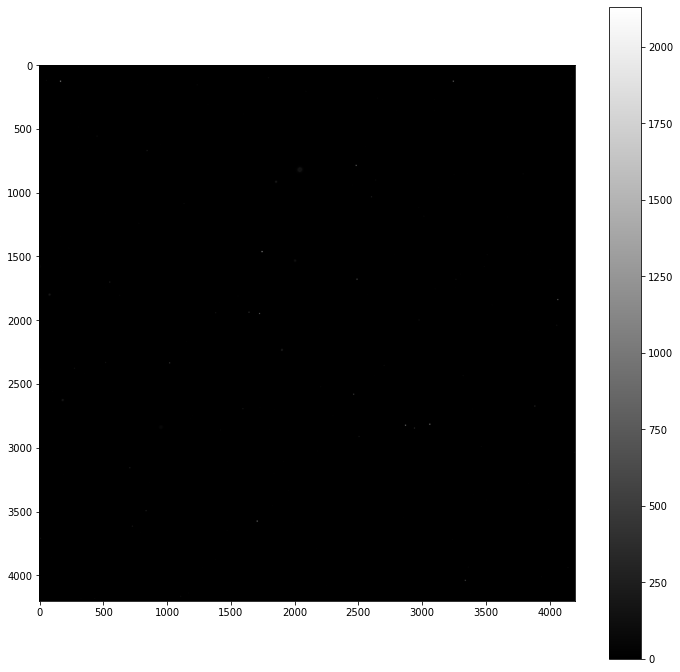

In [101]:
plt.rcParams["figure.figsize"] = [12.00, 12.00]
plt.imshow(image_data, cmap='gray')
plt.colorbar()

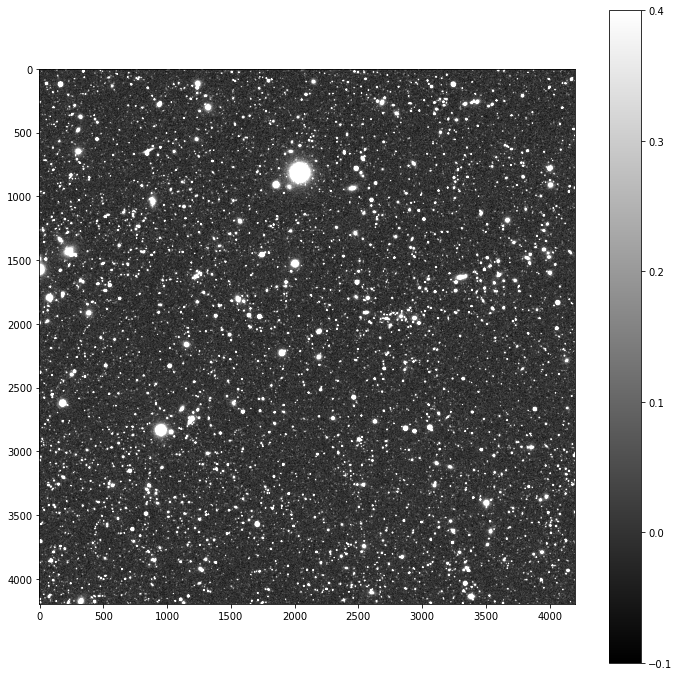

In [50]:
# Brightness Scaled (using statistics above)
# it seems the closer you go to the mean, the more structures appear
plt.imshow(image_data, cmap='gray',vmin=-0.1, vmax=0.4)
plt.colorbar()


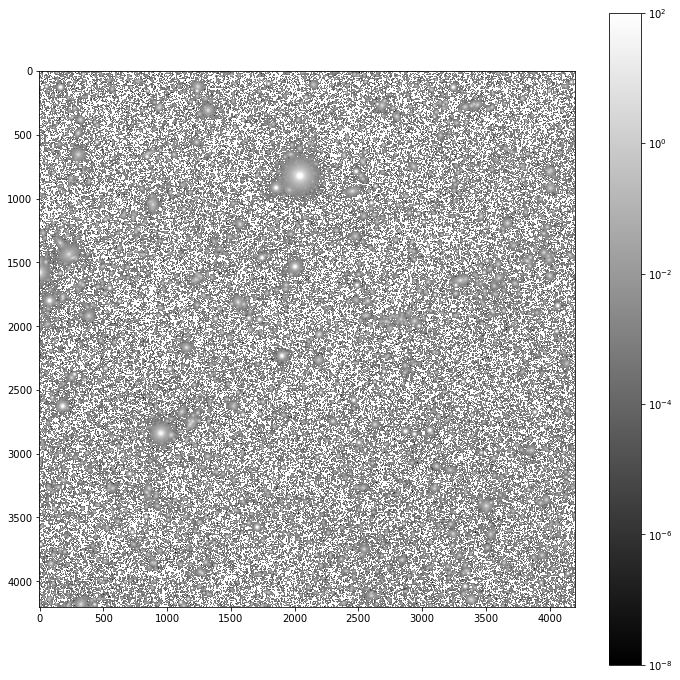

In [107]:
# Logarithmic Scaling
plt.imshow(image_data, cmap='gray', norm=LogNorm(vmin=0.00000001, vmax=100))
plt.colorbar()

In [ ]:

import requests

    
from pyvo.dal.adhoc import DatalinkResults, SodaQuery
query = """SELECT TOP 50 dataproduct_type,dataproduct_subtype,calib_level,lsst_band,em_min,em_max,lsst_tract,lsst_patch, lsst_filter,lsst_visit,lsst_detector,lsst_ccdvisitid,t_exptime,t_min,t_max,s_ra,s_dec,s_fov,
       obs_id,obs_collection,o_ucd,facility_name,instrument_name,obs_title,s_region,access_url,
       access_format FROM ivoa.ObsCore WHERE calib_level = 3 AND dataproduct_type = 'image' AND dataproduct_subtype = 'lsst.deepCoadd_calexp'
      AND CONTAINS(POINT('ICRS', 60.4, -35.1), s_region)=1"""
results = service.search(query)

dataLinkUrl = results[0].getdataurl()
auth_session = service._session
dl = DatalinkResults.from_result_url(dataLinkUrl, session=auth_session)
fits_images = []

for i in range(len(results)):
    dataLinkUrl = results[i].getdataurl()
    auth_session = service._session
    dl = DatalinkResults.from_result_url(dataLinkUrl, session=auth_session)
    fits_image_url = dl.__getitem__("access_url")[0]
    fits_images.append(fits_image_url)
# downloading to folder
for i in range(len(fits_images)):
    response = requests.get(fits_images[i])
    if response.status_code == 200:
         with open(f"rsb_fits_images/color_img{i}.fits", 'wb') as file:
             file.write(response.content)
         print("file downloaded successfully")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")


file downloaded successfully
file downloaded successfully
file downloaded successfully
file downloaded successfully
file downloaded successfully
file downloaded successfully


In [189]:
red_data = fits.getdata("rsb_fits_images/color_img0.fits")
green_data = fits.getdata("rsb_fits_images/color_img1.fits")
blue_data = fits.getdata("rsb_fits_images/color_img2.fits")

rgb_image = np.stack((red_data, green_data, blue_data),axis=-1)
plt.rcParams["figure.figsize"] = [12.00, 12.00]

In [119]:
layers = [red_data,green_data,blue_data]

for i in layers:
    print('Min:', np.min(i))
    print('Max:', np.max(i))
    print('Median:', np.median(i))
    print('Mean:', np.mean(i))
    print('Stdev:', np.std(i))
    print()

Min: -0.93190217
Max: 2340.1516
Median: 0.019324066
Mean: 0.1655291
Stdev: 7.952727

Min: -1.5364861
Max: 4466.2505
Median: 0.02498224
Mean: 0.24833132
Stdev: 15.011032

Min: -0.14295128
Max: 922.81744
Median: 0.004628065
Mean: 0.060833354
Stdev: 3.2738082



[W 2024-05-15 08:49:29,934.934 matplotlib.image] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


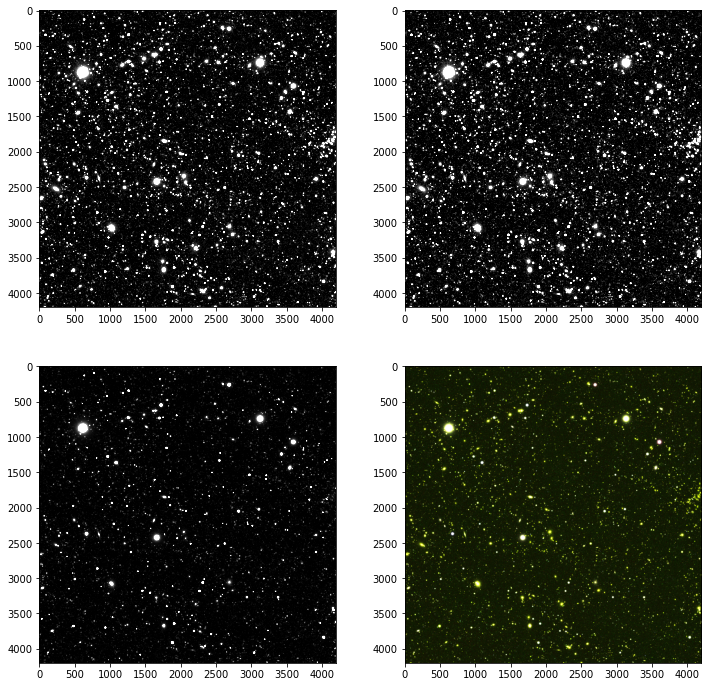

In [159]:
# scaling individual layers
fig, axs = plt.subplots(2,2)
# -0.05 and 0.2
axs[0,0].imshow(red_data, cmap='gray',vmin=0, vmax=0.4)
axs[0,1].imshow(green_data, cmap='gray',vmin=0, vmax=0.4)
axs[1,0].imshow(blue_data, cmap='gray',vmin=0, vmax=0.4)
rgb_image = np.stack((red_data, green_data, blue_data),axis=-1)
axs[1,1].imshow(rgb_image, cmap='gray',vmin=0, vmax=0.4)

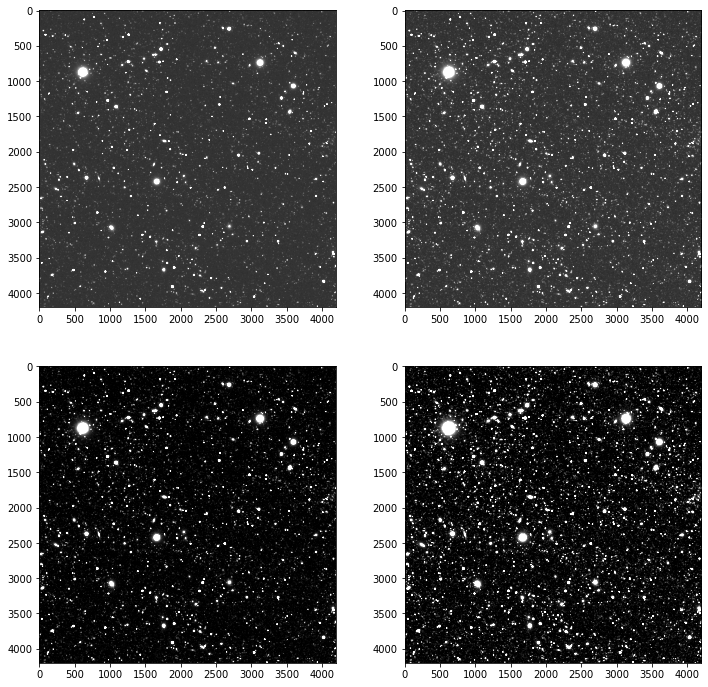

In [186]:
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(blue_data, cmap='gray',vmin=-0.1, vmax=0.4)
axs[0,1].imshow(blue_data, cmap='gray',vmin=-0.05, vmax=0.2)
axs[1,0].imshow(blue_data, cmap='gray',vmin=0, vmax=0.2)
axs[1,1].imshow(blue_data, cmap='gray',vmin=0, vmax=0.1)



In [190]:
blue_data[blue_data<0] = 0
blue_data[blue_data>0.1] = 0.4
blue_data[(blue_data > 0) & (blue_data <=0.05)] *= 8

[W 2024-05-15 09:12:10,800.800 matplotlib.image] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


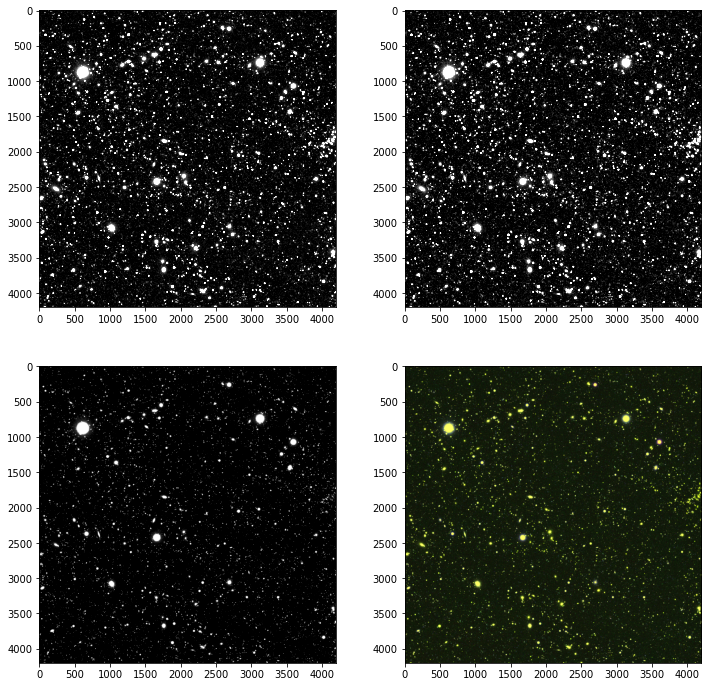

In [192]:
# scaling individual layers
fig, axs = plt.subplots(2,2)
# -0.05 and 0.2
axs[0,0].imshow(red_data, cmap='gray',vmin=0, vmax=0.4)
axs[0,1].imshow(green_data, cmap='gray',vmin=0, vmax=0.4)
axs[1,0].imshow(blue_data, cmap='gray',vmin=0.05, vmax=0.4)
rgb_scaled_image = np.stack((red_data, green_data, blue_data),axis=-1)
axs[1,1].imshow(rgb_scaled_image, cmap='gray',vmin=0, vmax=0.4)

In [177]:
print('Min:', np.min(blue_data))
print('Max:', np.max(blue_data))
print('Median:', np.median(blue_data))
print('Mean:', np.mean(blue_data))
print('Stdev:', np.std(blue_data))
print()

Min: 0.0
Max: 0.4
Median: 0.003791311
Mean: 0.021711258
Stdev: 0.06477852

